# The link for my dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
# There are 919 observations in this dataset and they are presented different values to each variable<br>
# There are 12 variable in this dataset, each variable is a factor and related to heart attack. for instances, T wave elevation is highly important to rule out weather the patient has acute heart attack or not, do they need cardioangiogram imeediately or not.<br>
# I am curious about the age,sex and blood presuse... factors that have somthing to do with AMI
# Five questions:<br>
1. Does ST_slope change indicate heartdisease?<br>
2. Does age has significant effect on having heart disease?<br>
3. Is different chest pain type cause ST_slope changes?<br>
4. does higher cholesterol indicate having heart disease?<br>
5. Does resting_BP have reationship with cholestrol level?<br>

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from scipy import stats

# Stops columns from being cut off when displayed
pd.set_option('display.max_colwidth', None)
hearts =pd.read_csv("heart.csv")



In [133]:
hearts.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [134]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [135]:
hearts.sort_values(["RestingBP","Cholesterol"])[["RestingBP","Cholesterol"]].head()



,RestingBP,Cholesterol
449,0,0
314,80,0
227,92,117
692,94,199
832,94,227


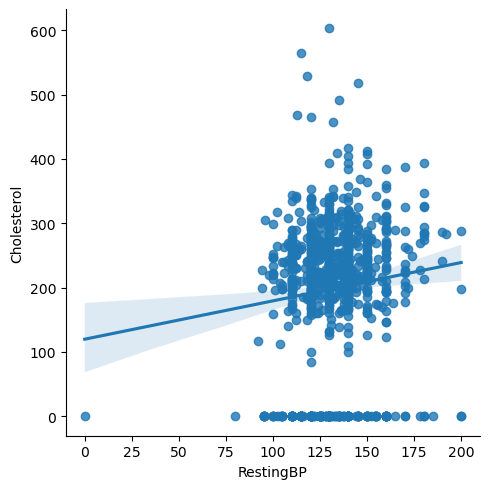

In [136]:
sns.lmplot(data=hearts,x="RestingBP",y="Cholesterol")
plt.show()

# There are 0 data in resting_BP and 0 in Cholesterol, so i am going to filter the 0 data.

In [137]:
hearts=hearts[(hearts["RestingBP"]>0)|(hearts["Cholesterol"]>0)]
hearts.sort_values(["RestingBP","Cholesterol"])[["RestingBP","Cholesterol"]]




,RestingBP,Cholesterol
314,80,0
227,92,117
692,94,199
832,94,227
294,95,0
...,...,...
759,192,283
365,200,0
399,200,0
241,200,198


In [138]:
hearts=hearts[(hearts["Cholesterol"]>0)]


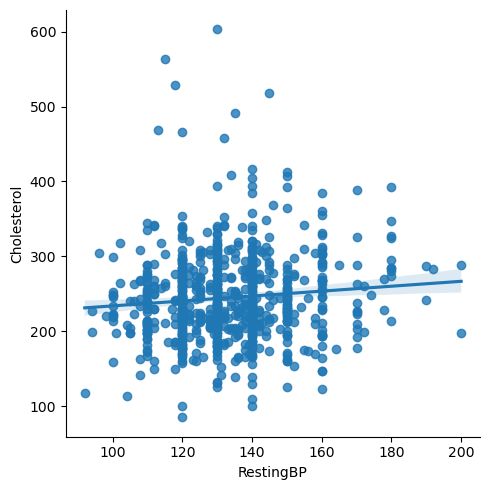

In [139]:
sns.lmplot(data=hearts,x="RestingBP",y="Cholesterol")
plt.show()

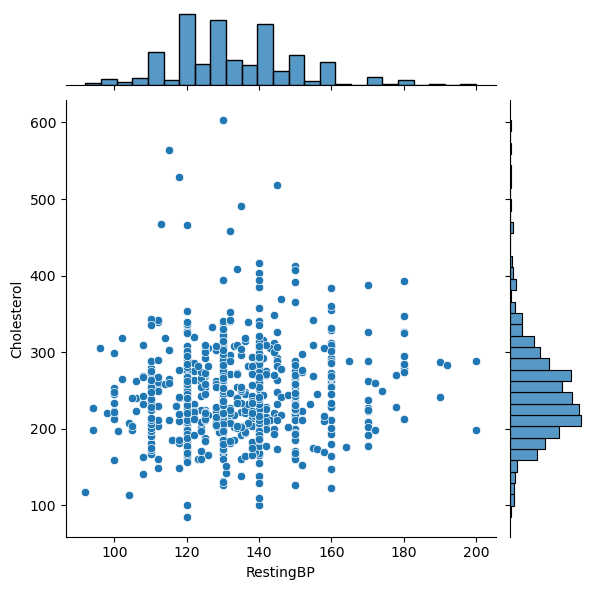

In [140]:
# Does resting_BP have reationship with cholestrol level?
sns.jointplot(data=hearts, x="RestingBP", y="Cholesterol")
plt.show()

In [82]:
hearts.value_counts("RestingBP")


RestingBP
120    110
130    102
140     95
150     48
110     46
      ... 
117      1
154      1
127      1
129      1
92       1
Name: count, Length: 63, dtype: int64

In [348]:
# Does resting_BP have reationship with cholestrol level?

stats.linregress(x = hearts["RestingBP"], y = hearts["Cholesterol"])


LinregressResult(slope=0.32837060492442366, intercept=200.9546153087464, rvalue=0.09593928890625067, pvalue=0.008740357102042236, stderr=0.12490313994995966, intercept_stderr=16.754421354526755)

# I am  able to tell there is a strong relationship between Cholesterol and resting BP.Because the p-value is 0.0087, also the stderr is 0.124 which means the dta represents the true mean of the populationcan. There is no outlier in Cholesterol and resting_BP after filtering it. Moreover the counts for resting_BP at 120mmHg is way more than other reading, I suspect that blood pressuure machine is not able to indicate the accurate blood pressure, and human blood pressure is dynamic.That is why the machince only can read approximate value.

In [142]:
heart2=hearts.drop(columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
heart2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           746 non-null    int64  
 1   RestingBP     746 non-null    int64  
 2   Cholesterol   746 non-null    int64  
 3   FastingBS     746 non-null    int64  
 4   MaxHR         746 non-null    int64  
 5   Oldpeak       746 non-null    float64
 6   HeartDisease  746 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 46.6 KB


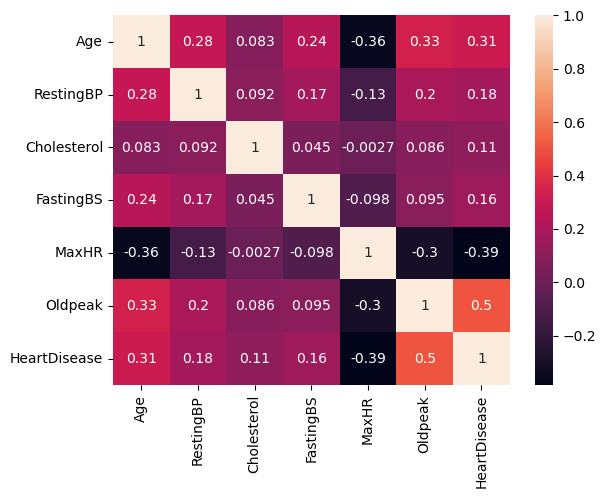

In [143]:
sns.heatmap(heart2.corr(method = "spearman"), annot = True)
plt.show()
#we can see the relationship after dropping the non-numeric data

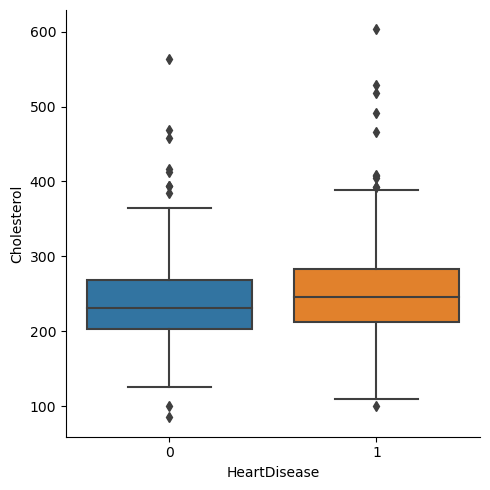

In [351]:
sns.catplot(data=hearts,x="HeartDisease",y="Cholesterol",kind="box")
plt.show()

In [144]:
#4. does higher cholesterol indicate having heart disease?<br>

noheartdisease = hearts[hearts["HeartDisease"] == 0]
hasheartdisease = hearts[hearts["HeartDisease"] == 1]

stats.ttest_ind(noheartdisease["Cholesterol"], hasheartdisease["Cholesterol"])

Ttest_indResult(statistic=-2.8484821957405964, pvalue=0.004514069106741928)

In [349]:
stats.linregress(x = hearts["HeartDisease"], y = hearts["Cholesterol"])


LinregressResult(slope=12.292566983578224, intercept=238.76923076923077, rvalue=0.10386559562465618, pvalue=0.0045140691067419, stderr=4.315479662102009, intercept_stderr=2.9811557033023384)

# # There is correlation between cholesterol and heartdisease, and it is significant relationship, because the p_value is less than 0.05 and the standard error shows it is more accurate representation between them.

In [226]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(hearts.iloc[:,[0,3,5,7,9,11]], hearts[["Cholesterol"]], random_state=234)
linearReg_train = linear_model.LinearRegression().fit(X_train, y_train)

lassoReg = linear_model.Lasso(alpha = 1).fit(X_train, y_train)
ridgeReg = linear_model.Ridge(alpha = 1).fit(X_train, y_train)
# only quantitative data for training the cholesterol level

In [227]:
linearReg_train.coef_

array([[-0.41591487,  0.2984604 , 13.30276668, -0.04417197,  0.07553599,
        15.13418608]])

In [228]:
pd.DataFrame({"variable" : X_test.columns, "coefficient" : linearReg_train.coef_[0]}).sort_values("coefficient")


,variable,coefficient
0,Age,-0.415915
3,MaxHR,-0.044172
4,Oldpeak,0.075536
1,RestingBP,0.298460
2,FastingBS,13.302767
5,HeartDisease,15.134186


In [229]:
pd.DataFrame({"variable" : X_test.columns, "coefficient" : ridgeReg.coef_[0]}).sort_values("coefficient")


,variable,coefficient
0,Age,-0.413865
3,MaxHR,-0.044797
4,Oldpeak,0.099140
1,RestingBP,0.298940
2,FastingBS,13.141797
5,HeartDisease,14.994461


# I will use ridge moedel and biger alpha value to train the data in order to to get better performance than linear model.
# HearDisease and Fasting BS are the most significant elements that affect the cholesterol level more.

In [186]:
linearReg_train.score(X_train, y_train)

0.0358808702196749

In [187]:
linearReg_train.score(X_test, y_test)

-0.07861780442877486

In [193]:
lassoReg.score(X_train, y_train)

0.03584680012660113

In [192]:
lassoReg.score(X_test, y_test)

-0.07562196028494905

In [237]:
ridgeReg.score(X_train, y_train)

0.03587865676188229

In [238]:
ridgeReg.score(X_test, y_test)

-0.07791497922878543

# I compared three different method of prdeiction. And .score() function calculates the accuracy in training and testing data. Three differnt methods have similiar score. All of them are quite low which means the predition base on test and train data are not so accurate.

In [239]:
cholesterol_pred_ridge = ridgeReg.predict(X_test)  # ridge model training on testing data

In [240]:
cholesterol_pred2_ridge = ridgeReg.predict(X_train) # ridge model  training on training data

In [241]:
metrics.r2_score(y_test, cholesterol_pred_ridge) #ridge on traning data

-0.07791497922878543

In [248]:
metrics.r2_score(y_train, cholesterol_pred2_ridge) #ridge on testing data

0.03587865676188229

# The data for cholesterol on training and testing are low which means the accuracy is not so great.
# The r2_score is not high which means the accuracy isn't good, so i won't recommond to use for prediction in the future<br>
# The reason may because the variables that predict the cholesterol don't have significant effect.
# I will still recommand ridge model to train data in the future, but we need to collect more related data.

# *********************************************************************************
# Additional requirements: Does age has significant effect on having heart disease?<br>


In [249]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


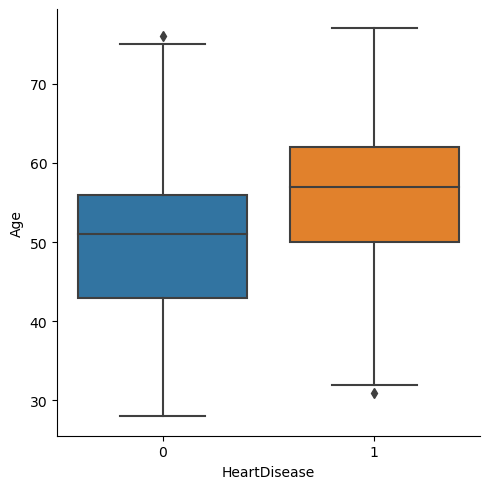

In [275]:
sns.catplot(data=hearts,x="HeartDisease",y="Age",kind="box")
plt.show()

In [276]:
noheartdisease = hearts[hearts["HeartDisease"] == 0]
hasheartdisease = hearts[hearts["HeartDisease"] == 1]
stats.ttest_ind(noheartdisease["Age"], hasheartdisease["Age"])

Ttest_indResult(statistic=-8.534583526140043, pvalue=7.861071765822652e-17)

In [ ]:
# The relationship between heartdisease and Age has strong effect to each othe, because the p-value is less than 0.05

In [277]:
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(hearts.iloc[:,[0,3,4,5,7,9]], hearts[["HeartDisease"]], random_state=400)
linearReg_train2 = linear_model.LinearRegression().fit(X_train2, y_train2)
linearReg_train2.coef_

array([[ 0.00293337,  0.00033892,  0.00031925,  0.13076858, -0.00465678,
         0.20123485]])

In [278]:
pd.DataFrame({"variable" : X_test2.columns, "coefficient" : linearReg_train2.coef_[0]}).sort_values("coefficient")


,variable,coefficient
4,MaxHR,-0.004657
2,Cholesterol,0.000319
1,RestingBP,0.000339
0,Age,0.002933
3,FastingBS,0.130769
5,Oldpeak,0.201235


In [291]:

lassoReg2 = linear_model.Lasso(alpha = 10).fit(X_train2, y_train2)
ridgeReg2 = linear_model.Ridge(alpha = 10).fit(X_train2, y_train2)
lassoReg2.coef_

array([ 0.,  0.,  0.,  0., -0.,  0.])

In [292]:
ridgeReg2.coef_

array([[ 0.00316723,  0.00039737,  0.00032324,  0.11465943, -0.00468705,
         0.19725947]])

In [293]:
pd.DataFrame({"variable" : X_test2.columns, "coefficient" : linearReg_train2.coef_[0]}).sort_values("coefficient")


,variable,coefficient
4,MaxHR,-0.004657
2,Cholesterol,0.000319
1,RestingBP,0.000339
0,Age,0.002933
3,FastingBS,0.130769
5,Oldpeak,0.201235


In [294]:
pd.DataFrame({"variable" : X_test2.columns, "coefficient" : ridgeReg2.coef_[0]}).sort_values("coefficient")


,variable,coefficient
4,MaxHR,-0.004687
2,Cholesterol,0.000323
1,RestingBP,0.000397
0,Age,0.003167
3,FastingBS,0.114659
5,Oldpeak,0.197259


In [308]:
heartdisease_pred_ridge = ridgeReg2.predict(X_test2)  # ridge model training on testing data

In [309]:
heartdisease_pred2_ridge = ridgeReg2.predict(X_train2) # ridge model  training on training data

In [310]:
metrics.r2_score(y_test2, heartdisease_pred_ridge) #ridge on traning data, more accurate when alpha is greater

0.32168227182929443

In [311]:
metrics.r2_score(y_train2, heartdisease_pred2_ridge) #ridge on testing data, more accurate when alpha is greater

0.3322555223843052

# The scores of the prediction on the traning data is : 0.32168227182929443
# The scores of the prediction on the testing data is : 0.3322555223843052
# The Oldpeak has most effect on heartdisease prediction.



In [318]:
heartdisease_pred_ridge[heartdisease_pred_ridge <= 0.5] = 0.
heartdisease_pred_ridge[heartdisease_pred_ridge > 0.5] = 1.
heartdisease_pred2_ridge[heartdisease_pred2_ridge <= 0.5] = 0.
heartdisease_pred2_ridge[heartdisease_pred2_ridge > 0.5] = 1.



In [319]:
metrics.confusion_matrix(y_test2, heartdisease_pred_ridge)
#y_pred = logreg.predict(X_test)
#metrics.confusion_matrix(y_test, y_pred)

array([[76, 14],
       [28, 69]])

# As confusion matrix shows there are 76 true negatives and 69 true positives in this prediction

# The scores are still low which means the accuracy is not high, but this prediction is higher than the cholesterol prediction. I tried to make alpha greater, so the training will be more strict, but the outcome has insignificant effect. I will still recommend this model to train data, but definitely will collect more data that is related to heartdisease. 


# Challenge problem:
# Does ST_slope change indicate heartdisease?<br>


In [320]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 91.9+ KB


In [324]:
hearts.value_counts("ST_Slope")

ST_Slope
Flat    354
Up      349
Down     43
Name: count, dtype: int64

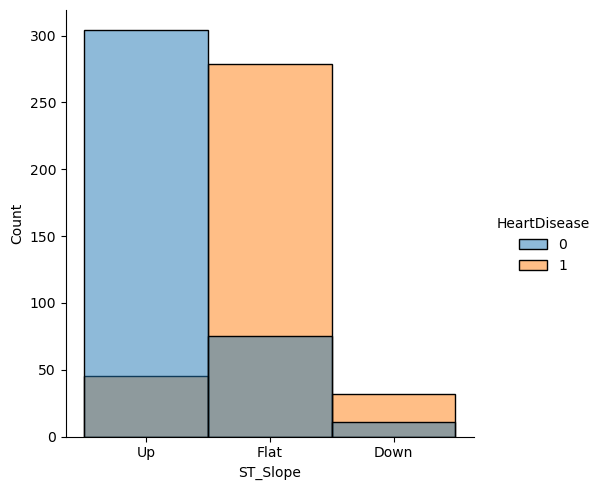

In [331]:
sns.displot(data=hearts, x="ST_Slope",hue = "HeartDisease", kind = "hist")
plt.show()


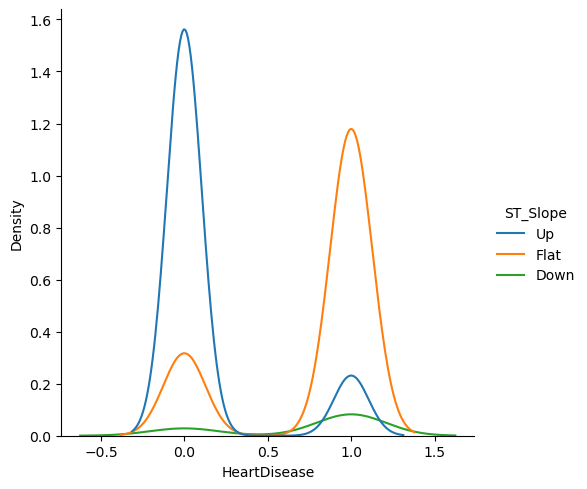

In [333]:
sns.displot(data=hearts, x = "HeartDisease", hue="ST_Slope", kind="kde")
plt.show()

# Above diagram shows there are more heartdisease patient who have flat ST_slope, whereas up ST_slope has less heartdisease.

In [338]:
# new dataframe for heartdisease and st_slope

CrosstabResult=pd.crosstab(index=hearts['ST_Slope'],columns=hearts['HeartDisease'])
CrosstabResult


HeartDisease,0,1
ST_Slope,,
Down,11,32
Flat,75,279
Up,304,45


In [339]:

# importing the required function
from scipy.stats import chi2_contingency

In [341]:

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
ChiSqResult

Chi2ContingencyResult(statistic=319.13762270357586, pvalue=5.013554566295527e-70, dof=2, expected_freq=array([[ 22.47989276,  20.52010724],
       [185.06702413, 168.93297587],
       [182.45308311, 166.54691689]]))

# The p-value between Heartdisease and ST_slpoe is signifacantly less than 0.05. so the null hypothesis is rejected which means there is a relationship between two variables. But in this case, it is not able to tell different ST_slop will "cause" or "indicate" the person has heartdisease or not. 

# Conclusion: Before analysing the data, I am pretty sure that ST_slope up indicates patient has heart attack, and may need immediately treatment. However, the last part of analysis shows exactly in the other way. Flat ST_slope has more heartdisease. i remember Dr Kelvin in national heart center singapore, said that st changing means cardio muscle has injury. Therefore, i am not 100% believe this dataset.


# Another analysis showed there are strong relationship between two variables. But when I run the predicting model for training data and testin gdata, the score of accuracy is not great to convince me to trust this dataset 100%. Therefore, when we look for the dataset that we need, we still need to be cautious and check the reliability. 